<a href="https://colab.research.google.com/github/boku13/prml_course_project/blob/main/notebooks/Neermita/PRML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data don't **touch**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from scipy.stats import randint as sp_randint
import pickle

In [4]:
from sklearn.datasets import fetch_openml
from keras.datasets import cifar10 #to use predefined train and test splits
cifar10d= fetch_openml("cifar_10")  #to visualise data


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(dir(cifar10))
print(dir(cifar10d))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'load_data']
['DESCR', 'categories', 'data', 'details', 'feature_names', 'frame', 'target', 'target_names', 'url']


In [ ]:
import pprint
pprint.pprint(cifar10d)

{'DESCR': '**Author**: Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton    \n'
          '**Source**: [University of '
          'Toronto](https://www.cs.toronto.edu/~kriz/cifar.html) - 2009  \n'
          '**Please cite**: Alex Krizhevsky (2009) Learning Multiple Layers of '
          'Features from Tiny Images, Tech Report.\n'
          '\n'
          '**CIFAR-10** is a labeled subset of the [80 million tiny images '
          'dataset](http://groups.csail.mit.edu/vision/TinyImages/). It '
          '(originally) consists 32x32 color images representing 10 classes of '
          'objects:  \n'
          '0. airplane  \n'
          '1. automobile          \n'
          '2. bird          \n'
          '3. cat          \n'
          '4. deer          \n'
          '5. dog          \n'
          '6. frog          \n'
          '7. horse          \n'
          '8. ship          \n'
          '9. truck          \n'
          '\n'
          'CIFAR-10 contains 6000 images per class. The orig

In [4]:
print(cifar10d.feature_names)

['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50', 'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60', 'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70', 'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78', 'a79', 'a80', 'a81', 'a82', 'a83', 'a84', 'a85', 'a86', 'a87', 'a88', 'a89', 'a90', 'a91', 'a92', 'a93', 'a94', 'a95', 'a96', 'a97', 'a98', 'a99', 'a100', 'a101', 'a102', 'a103', 'a104', 'a105', 'a106', 'a107', 'a108', 'a109', 'a110', 'a111', 'a112', 'a113', 'a114', 'a115', 'a116', 'a117', 'a118', 'a119', 'a120', 'a121', 'a122', 'a123', 'a124', 'a125', 'a126', 'a127', 'a128', 'a129', 'a130', 'a131', 'a132', 'a133', 'a134', 'a135', 'a136', 'a137', 'a138

In [5]:
#print(cifar10.target)
print(cifar10d.target.shape)
#print(cifar10.data)
print(cifar10d.data.shape
      )
print(cifar10d.target)
print(cifar10d.target_names)
y = cifar10d.target_names[0]
print(y)
target_namesi = cifar10d.target_names
n_classes = len(target_namesi)
print(n_classes)

(60000,)
(60000, 3072)
0        8
1        5
2        0
3        6
4        9
        ..
59995    8
59996    3
59997    5
59998    1
59999    7
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
['class']
class
1


In [6]:
cdata= cifar10d.data

In [ ]:
print(cdata) #note that this contains full dataset. need the predfined train and test splits using keras

          a0     a1     a2     a3     a4     a5     a6     a7     a8     a9  \
0       26.0   17.0   13.0   13.0   13.0   14.0   14.0   15.0   14.0   10.0   
1       94.0  101.0   95.0   94.0   94.0   97.0  111.0  142.0  166.0  154.0   
2      183.0  158.0  166.0  167.0  169.0  171.0  163.0  163.0  160.0  161.0   
3      255.0  254.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
4      182.0  156.0  156.0  144.0  118.0  132.0  148.0  118.0  136.0   85.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
59995   76.0   76.0   77.0   76.0   75.0   76.0   76.0   76.0   76.0   78.0   
59996   81.0   91.0   98.0  106.0  108.0  110.0   80.0   84.0   88.0   90.0   
59997   20.0   19.0   15.0   15.0   14.0   13.0   12.0   11.0   10.0    9.0   
59998   25.0   15.0   23.0   17.0   23.0   51.0   74.0   91.0  114.0  137.0   
59999   73.0   98.0   99.0   77.0   59.0  146.0  214.0  176.0  125.0  218.0   

       ...  a3062  a3063  a3064  a3065  a3066  a306

In [5]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print('Traning data shape:', X_train.shape)
print('Testing data shape:', X_test.shape)
print("Training label shape: ",y_train.shape)
print("Testing label shape: ",y_test.shape)
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Training label shape:  (50000, 1)
Testing label shape:  (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


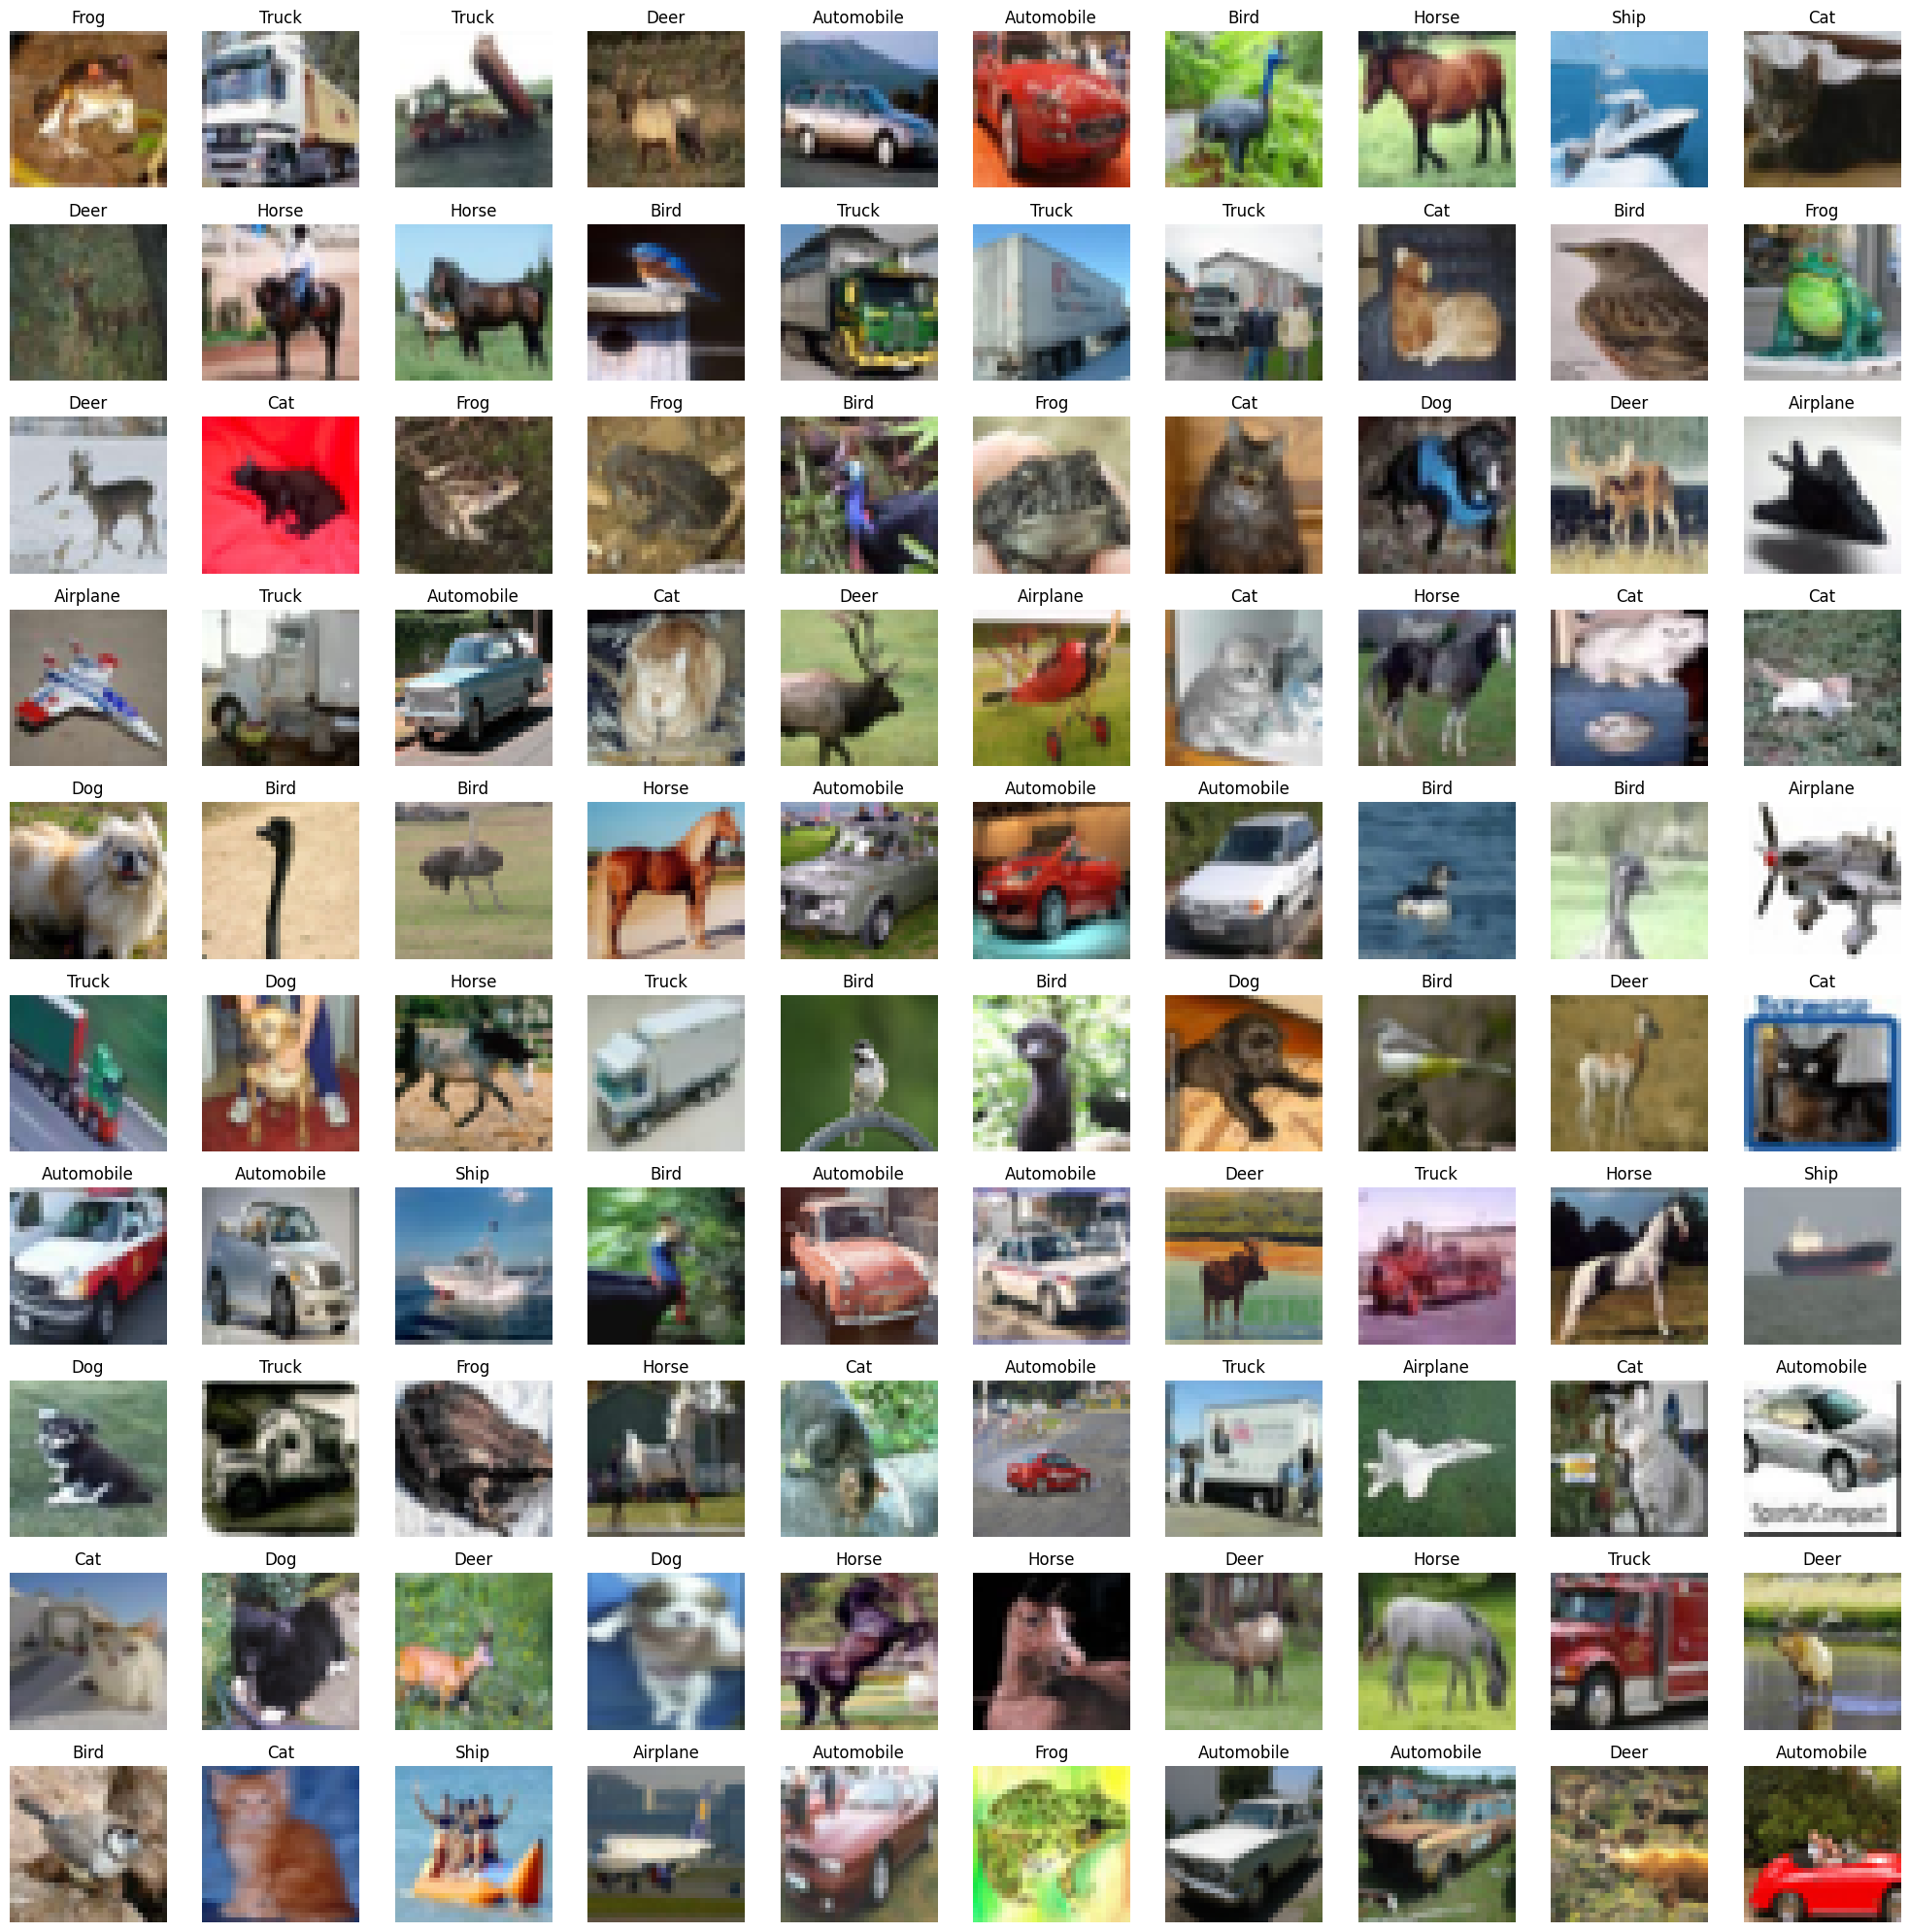

In [8]:
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}


def display_images(images, labels, nrows=10, ncols=10):

    plt.figure(figsize=(20, 20))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i], interpolation='nearest')
        label_index = labels[i][0]
        plt.title(class_names[label_index])
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    #display 100 training images
display_images(X_train, y_train)

CIFAR-10 Dataset:


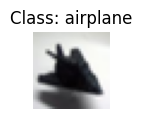

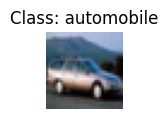

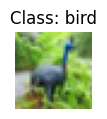

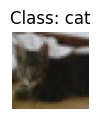

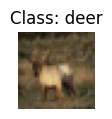

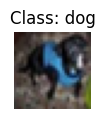

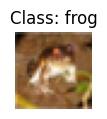

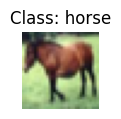

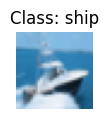

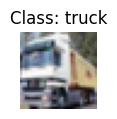

In [10]:
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                'dog', 'frog', 'horse', 'ship', 'truck']

# Print the CIFAR-10 dataset
print("CIFAR-10 Dataset:")
for i in range(10):
    # Find the index of the first occurrence of class i in y_train
    idx = np.where(y_train == i)[0][0]
    # Display the first image of class i
    plt.figure(figsize=(1, 1))
    plt.imshow(X_train[idx].reshape(32, 32, 3), cmap='gray')
    plt.title(f"Class: {class_labels[i]}")
    plt.axis('off')
    plt.show()

## Preparing for PCA

In [6]:
X_trainu = X_train.reshape((X_train.shape[0], -1))  # Reshapes to (50000, 3072)
X_testu = X_test.reshape((X_test.shape[0], -1))

In [11]:
np.min(X_train),np.max(X_train)

(0, 255)

In [7]:
scaler = StandardScaler()

x_train = scaler.fit_transform(X_trainu)
x_test= scaler.transform(X_testu)

In [13]:
features = ['pixel '+str(i) for i in range(x_train.shape[1])]
print(features)
cols=cifar10d.feature_names
print(cols)
feature_cols = ['pixel ' + item for item in cols]
print(feature_cols)
print(y_train.shape)

print(len(feature_cols))

['pixel 0', 'pixel 1', 'pixel 2', 'pixel 3', 'pixel 4', 'pixel 5', 'pixel 6', 'pixel 7', 'pixel 8', 'pixel 9', 'pixel 10', 'pixel 11', 'pixel 12', 'pixel 13', 'pixel 14', 'pixel 15', 'pixel 16', 'pixel 17', 'pixel 18', 'pixel 19', 'pixel 20', 'pixel 21', 'pixel 22', 'pixel 23', 'pixel 24', 'pixel 25', 'pixel 26', 'pixel 27', 'pixel 28', 'pixel 29', 'pixel 30', 'pixel 31', 'pixel 32', 'pixel 33', 'pixel 34', 'pixel 35', 'pixel 36', 'pixel 37', 'pixel 38', 'pixel 39', 'pixel 40', 'pixel 41', 'pixel 42', 'pixel 43', 'pixel 44', 'pixel 45', 'pixel 46', 'pixel 47', 'pixel 48', 'pixel 49', 'pixel 50', 'pixel 51', 'pixel 52', 'pixel 53', 'pixel 54', 'pixel 55', 'pixel 56', 'pixel 57', 'pixel 58', 'pixel 59', 'pixel 60', 'pixel 61', 'pixel 62', 'pixel 63', 'pixel 64', 'pixel 65', 'pixel 66', 'pixel 67', 'pixel 68', 'pixel 69', 'pixel 70', 'pixel 71', 'pixel 72', 'pixel 73', 'pixel 74', 'pixel 75', 'pixel 76', 'pixel 77', 'pixel 78', 'pixel 79', 'pixel 80', 'pixel 81', 'pixel 82', 'pixel 83', '

In [14]:
df_cifar = pd.DataFrame(x_train,columns=feature_cols)

df_cifar['label'] = y_train
print(df_cifar.shape)
print(df_cifar)

(50000, 3073)
       pixel a0  pixel a1  pixel a2  pixel a3  pixel a4  pixel a5  pixel a6  \
0     -0.976824 -1.015758 -0.864571 -1.202901 -1.243973 -1.091163 -1.121963   
1      0.317240  0.561588  0.676780 -0.057154  0.021664  0.052093 -0.360611   
2      1.693034  1.631441  1.522036  1.695976  1.635002  1.521992  1.688121   
3     -1.399097 -1.523252 -1.523374 -1.285726 -1.410870 -1.417807 -1.288077   
4      0.535188  0.602736  0.813512  0.522621  0.591895  0.805887  0.636070   
...         ...       ...       ...       ...       ...       ...       ...   
49995  0.194644  0.342131  0.763791  0.287950  0.424998  0.843577  0.345371   
49996  1.693034  1.494280 -0.006884  1.709780  1.551553  0.026966  1.715807   
49997 -1.303745  0.575304  1.273431 -1.244313  0.564079  1.346107 -1.232706   
49998  0.794000  1.027934  1.335582  0.771096  1.009138  1.308417  0.746812   
49999  1.338869  1.274823  1.323152  1.461305  1.412473  1.446613  1.425108   

       pixel a7  pixel a8  pixel a9  

In [15]:
df_cifar.head()

,pixel a0,pixel a1,pixel a2,pixel a3,pixel a4,pixel a5,pixel a6,pixel a7,pixel a8,pixel a9,...,pixel a3063,pixel a3064,pixel a3065,pixel a3066,pixel a3067,pixel a3068,pixel a3069,pixel a3070,pixel a3071,label
0,-0.976824,-1.015758,-0.864571,-1.202901,-1.243973,-1.091163,-1.121963,-1.231216,-1.127749,-0.882707,...,1.395088,0.946620,0.403264,0.380740,-0.123197,-0.458600,-0.056050,-0.540320,-0.641402,6
1,0.317240,0.561588,0.676780,-0.057154,0.021664,0.052093,-0.360611,-0.449900,-0.473116,-0.410588,...,0.253645,0.118572,0.387855,0.256086,0.135572,0.430806,0.251995,0.114124,0.448238,9
2,1.693034,1.631441,1.522036,1.695976,1.635002,1.521992,1.688121,1.628957,1.515960,1.686173,...,-0.762709,-0.660768,-0.475092,-0.741144,-0.656910,-0.473935,-0.718346,-0.636092,-0.459796,9
3,-1.399097,-1.523252,-1.523374,-1.285726,-1.410870,-1.417807,-1.288077,-1.412593,-1.417298,-1.243738,...,-1.137978,-1.277745,-1.322628,-0.990451,-1.125930,-1.179326,-0.841564,-0.971295,-1.034884,4
4,0.535188,0.602736,0.813512,0.522621,0.591895,0.805887,0.636070,0.680217,0.886505,0.714164,...,-0.809617,-0.758185,-0.490501,-0.865797,-0.818641,-0.550608,-0.826162,-0.779750,-0.520331,1


In [16]:
pca = PCA()
X_pca = pca.fit_transform(df_cifar.iloc[:,:-1])

# Explained variance
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()

# Print results
print(f"Explained Variance:\n{explained_variance}")
print(f"Total Explained Variance: {total_explained_variance:.4f}")

Explained Variance:
[8.27004984e+02 3.49308855e+02 2.20112108e+02 ... 2.42349805e-05
 2.25321319e-05 2.24272605e-05]
Total Explained Variance: 3072.0614


In [17]:
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

# Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")


Explained Variance Ratio:
[2.69201967e-01 1.13705036e-01 7.16496439e-02 ... 7.88883326e-09
 7.33453165e-09 7.30039453e-09]
Total Explained Variance Ratio: 1.0000


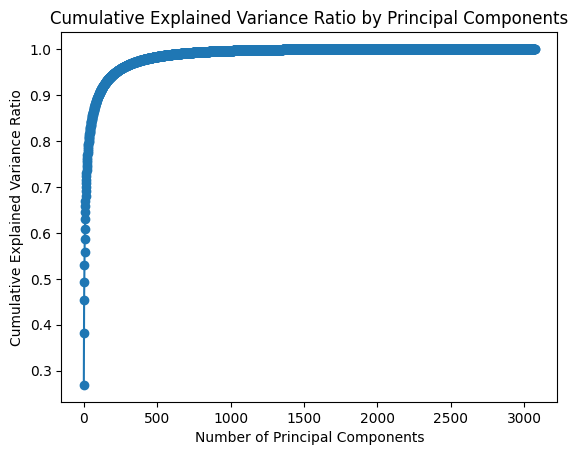

In [18]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

## Using PCA

In [33]:
n=50

pca250 = PCA(n_components=n, svd_solver="randomized", whiten=True).fit(df_cifar.iloc[:,:-1])

<ipython-input-20-a1c0865820d5>:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


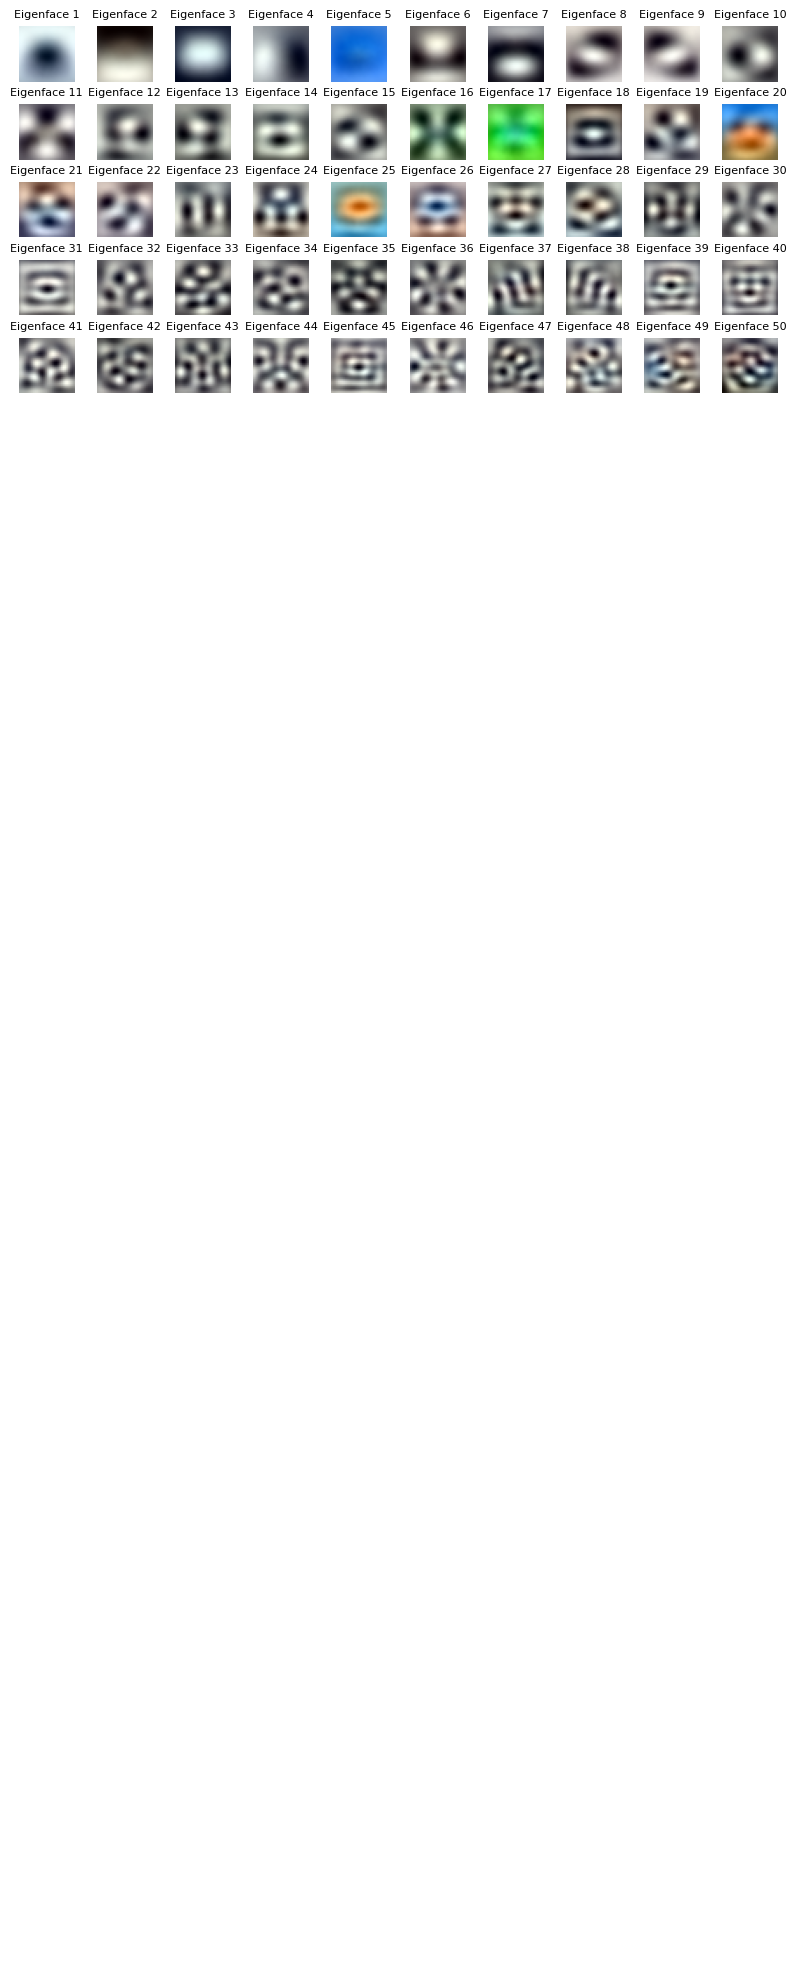

In [20]:
components = pca250.components_

fig, axes = plt.subplots(25, 10, figsize=(10, 25),
                         subplot_kw={'xticks': [], 'yticks': []},
                         gridspec_kw=dict(hspace=0.4, wspace=0.1))
for i, ax in enumerate(axes.flat):
    if i < n:
        # Reshape the component to 32x32x3 and scale back to 0-255
        eigenface = components[i].reshape(32, 32, 3)
        eigenface = (eigenface - eigenface.min()) / (eigenface.max() - eigenface.min()) * 255

        # Display the eigenface
        ax.imshow(eigenface.astype(np.uint8))

        # Set the title for each subplot to indicate the eigenface number
        ax.set_title(f"Eigenface {i+1}", fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [34]:
X_train_pca = pca250.transform(x_train)
X_test_pca = pca250.transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [35]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(50000, 50)
(10000, 50)


In [36]:
param_dist = {
    "n_neighbors": sp_randint(1, 20),  #Randomly sample values for n_neighbors between 1 and 30
    "weights": ["uniform", "distance"],  #Either equally weighted or distance weighted
}

#Create a kNN classifier instance
knn= KNeighborsClassifier()

# Setup the randomized search with kNN, using 10 iterations and cross-validation with 3 folds
# n_jobs=-1 means using all processors
clf = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1)
y_train = y_train.ravel()

clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best estimator found by grid search:
KNeighborsClassifier(n_neighbors=7, weights='distance')


Confusion Matrix:
[[568   7 106   6  57   8  45   7 191   5]
 [108 274  79  23 108  26 134  26 182  40]
 [101   1 427  29 254  20 118  16  33   1]
 [ 50  12 197 146 174  84 269  31  30   7]
 [ 44   0 192   6 601  14  96  20  25   2]
 [ 39   2 220 106 176 231 171  27  26   2]
 [ 14   2 150  20 249  15 538   3   8   1]
 [ 55   2 131  51 227  35  92 367  29  11]
 [150  11  56   7  52   5  53   8 650   8]
 [108  58  81  33  99  26 157  36 210 192]]
Accuracy: 0.3994
              precision    recall  f1-score   support

           0       0.46      0.57      0.51      1000
           1       0.74      0.27      0.40      1000
           2       0.26      0.43      0.32      1000
           3       0.34      0.15      0.20      1000
           4       0.30      0.60      0.40      1000
           5       0.50      0.23      0.32      1000
           6       0.32      0.54      0.40      1000
           7       0.68      0.37      0.48      1000
           8       0.47      0.65      0.55    

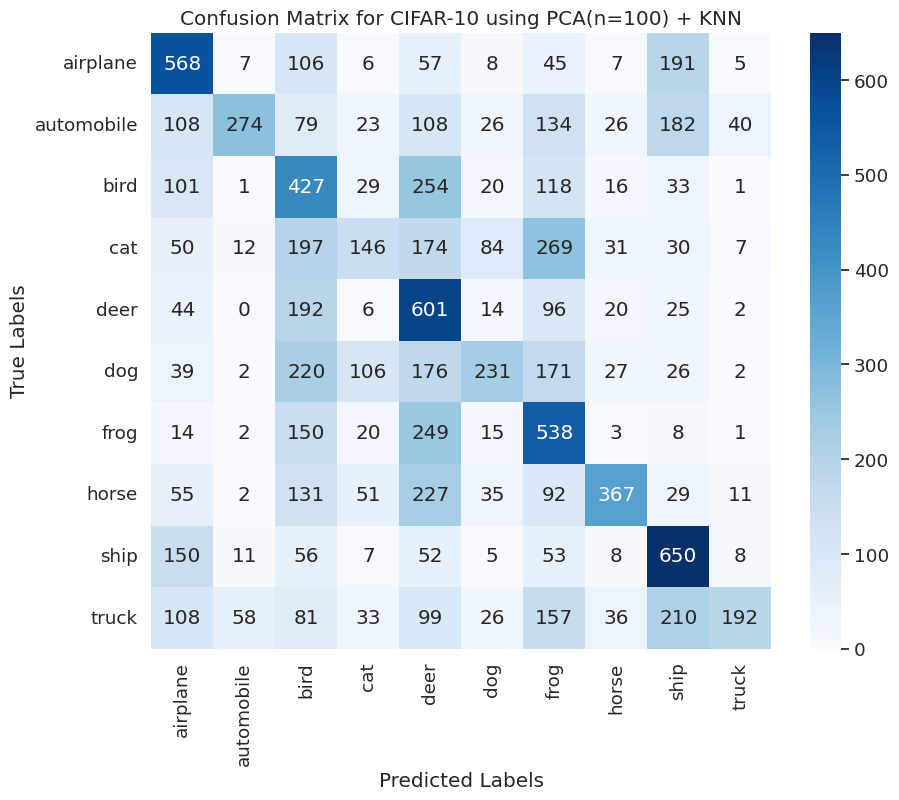

In [37]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred = knn.predict(X_test_pca)

# Calculate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix as an image
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CIFAR-10 using PCA(n=100) + KNN')
plt.show()

In [40]:
model_pathk = 'knn_model.pkl'
with open(model_pathk, 'wb') as file:
    pickle.dump(knn, file)

print(f'Model saved to {model_pathk}')

Model saved to knn_model.pkl


#Using various classifiers with PCA

## Decision Trees

Best Parameters: {'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.45      0.42      1000
           1       0.36      0.36      0.36      1000
           2       0.29      0.17      0.22      1000
           3       0.22      0.17      0.19      1000
           4       0.23      0.28      0.25      1000
           5       0.32      0.26      0.29      1000
           6       0.28      0.41      0.34      1000
           7       0.25      0.27      0.26      1000
           8       0.44      0.47      0.46      1000
           9       0.36      0.31      0.33      1000

    accuracy                           0.31     10000
   macro avg       0.32      0.31      0.31     10000
weighted avg       0.32      0.31      0.31     10000



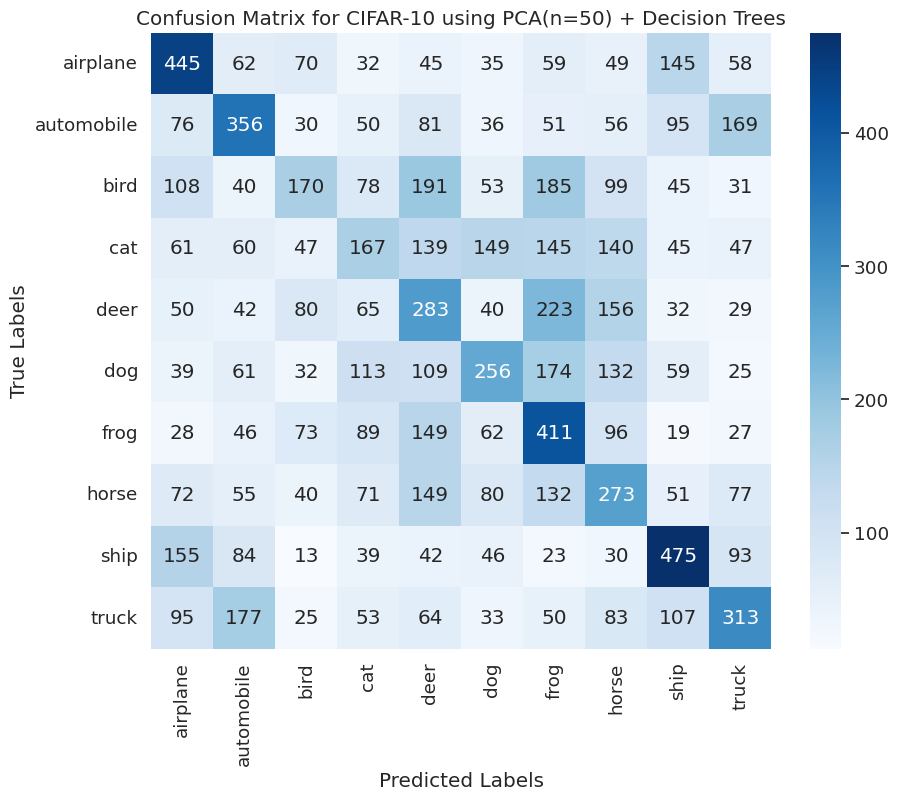

In [41]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


n_components = 50
pca = PCA(n_components=n_components)

X_train_pcadt = pca.fit_transform(x_train)
dt = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [5, 10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train_pcadt, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


X_test_pcadt = pca.transform(x_test)
y_preddt = grid_search.predict(X_test_pcadt)
print("Classification Report:")
print(classification_report(y_test, y_preddt))
conf_matrixd = confusion_matrix(y_test, y_preddt)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrixd, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CIFAR-10 using PCA(n=50) + Decision Trees')
plt.show()




In [43]:
model_pathd = 'decision_tree_model.pkl'
with open(model_pathd, 'wb') as file:
    pickle.dump(dt, file)

print(f'Model saved to {model_pathd}')

Model saved to decision_tree_model.pkl


## AdaBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.44      0.42      1000
           1       0.40      0.35      0.38      1000
           2       0.25      0.17      0.20      1000
           3       0.29      0.16      0.21      1000
           4       0.29      0.26      0.27      1000
           5       0.35      0.33      0.34      1000
           6       0.33      0.54      0.41      1000
           7       0.35      0.31      0.33      1000
           8       0.40      0.52      0.45      1000
           9       0.40      0.43      0.41      1000

    accuracy                           0.35     10000
   macro avg       0.35      0.35      0.34     10000
weighted avg       0.35      0.35      0.34     10000



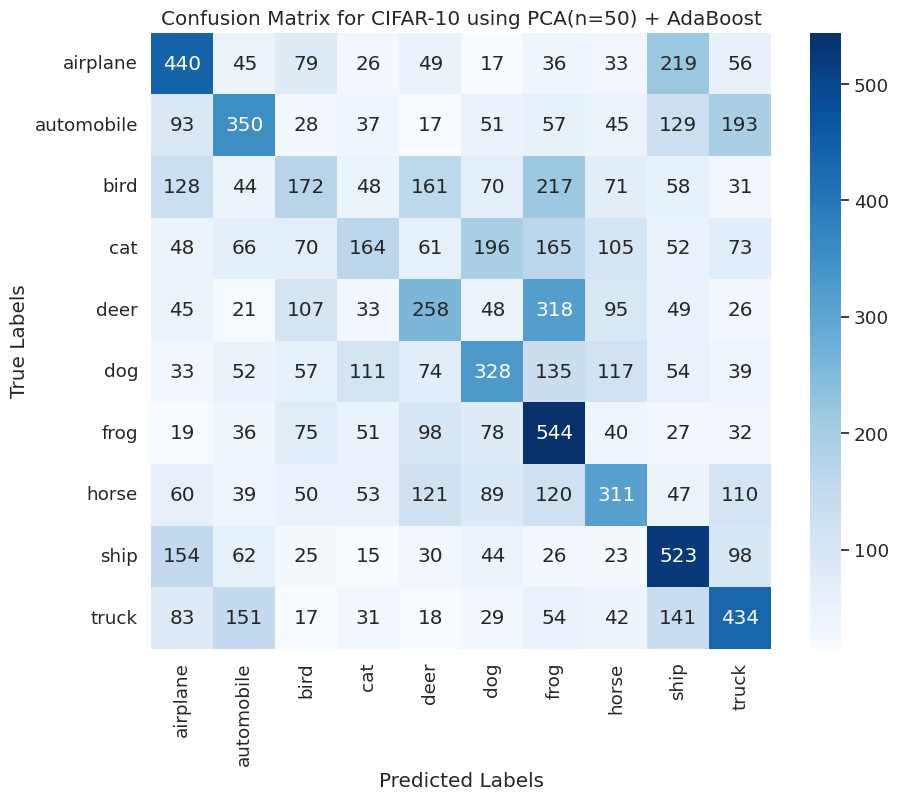

In [42]:
from sklearn.ensemble import AdaBoostClassifier



n_components = 50 #change
pca = PCA(n_components=n_components)


X_train_pcaad = pca.fit_transform(x_train)
y_train=y_train.ravel()
y_test= y_test.ravel()
# Define the AdaBoostClassifier
ad = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)


ad.fit(X_train_pcaad, y_train)

X_test_pcaad = pca.transform(x_test)

y_predad = ad.predict(X_test_pcaad)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_predad))
conf_matrixad = confusion_matrix(y_test, y_predad)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(conf_matrixad, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CIFAR-10 using PCA(n=50) + AdaBoost')
plt.show()



In [44]:
model_pathad = 'ada_boost_model.pkl'
with open(model_pathad, 'wb') as file:
    pickle.dump(ad, file)

print(f'Model saved to {model_pathad}')

Model saved to ada_boost_model.pkl


## Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1000
           1       0.53      0.58      0.55      1000
           2       0.38      0.32      0.34      1000
           3       0.33      0.29      0.31      1000
           4       0.41      0.36      0.38      1000
           5       0.39      0.36      0.38      1000
           6       0.46      0.55      0.50      1000
           7       0.51      0.45      0.48      1000
           8       0.54      0.62      0.58      1000
           9       0.48      0.52      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



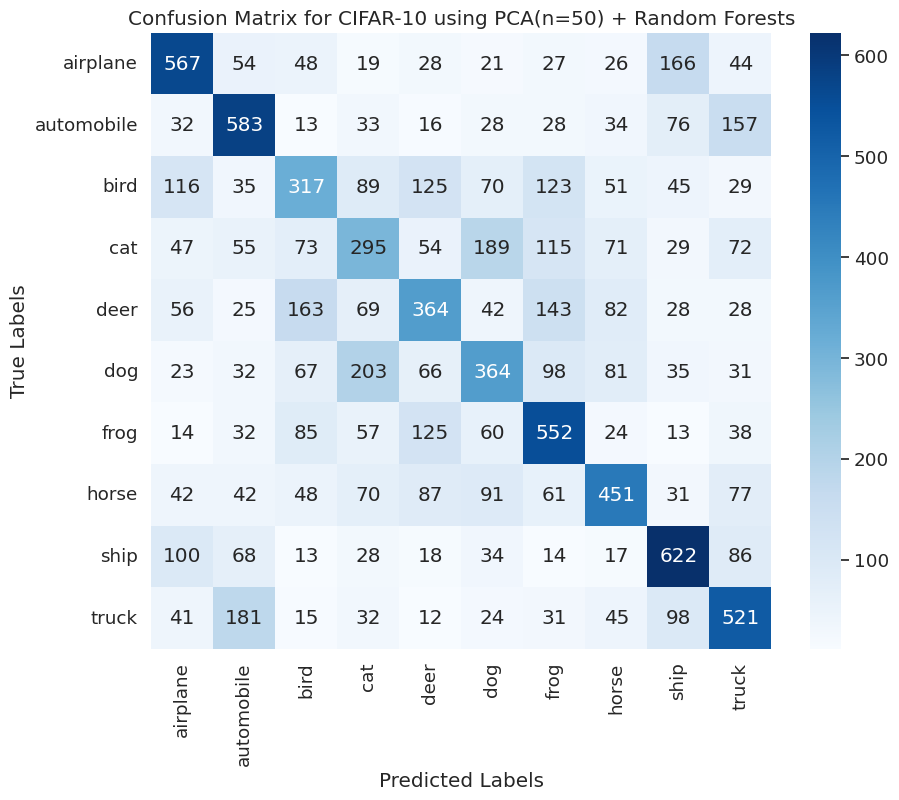

In [10]:
from sklearn.ensemble import RandomForestClassifier
import pickle


n_components = 50  #changing
pca = PCA(n_components=n_components)

X_train_pcarf = pca.fit_transform(x_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
y_train= y_train.ravel()
rf.fit(X_train_pcarf, y_train)

y_test= y_test.ravel()
X_test_pcarf = pca.transform(x_test)
y_predrf = rf.predict(X_test_pcarf)


print("Classification Report:")
print(classification_report(y_test, y_predrf))
conf_matrixrf = confusion_matrix(y_test, y_predrf)
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font size
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(conf_matrixrf, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CIFAR-10 using PCA(n=50) + Random Forests')
plt.show()

In [11]:
model_path = 'random_forest_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(rf, file)

print(f'Model saved to {model_path}')

Model saved to random_forest_model.pkl


In [13]:
import bz2



def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)


compressed_pickle('random_forest_model', rf)

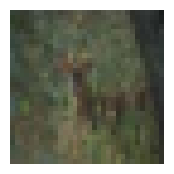

In [48]:
image_sample = X_train[10]


plt.figure(figsize=(2,2))  # Size in inches; adjust as needed for your display
plt.imshow(image_sample, interpolation='nearest')
plt.axis('off')  # Optional: Removes the axis for a cleaner image
plt.show()

In [49]:
print(y_train[10])


4


In [50]:

image_sample_flattened = image_sample.flatten().reshape(1, -1)
image_sample_scaled = scaler.transform(image_sample_flattened)

image_pca = pca.transform(image_sample_scaled)


model_path = '/content/random_forest_model.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)

prediction = model.predict(image_pca)
print(f"Predicted class: {prediction[0]}")


Predicted class: 4


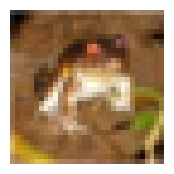

6


In [53]:
image_sample2 = X_train[0]


plt.figure(figsize=(2,2))  # Size in inches; adjust as needed for your display
plt.imshow(image_sample2, interpolation='nearest')
plt.axis('off')  # Optional: Removes the axis for a cleaner image
plt.show()
print(y_train[0])

In [54]:

image22= image_sample2.flatten().reshape(1, -1)
image_sample_scaled2 = scaler.transform(image22)

image_pca2 = pca.transform(image_sample_scaled2)


model_path = '/content/random_forest_model.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)

prediction = model.predict(image_pca2)
print(f"Predicted class: {prediction[0]}")

Predicted class: 6
